Average accuracy for k=1: 0.8332
Average accuracy for k=3: 0.8424
Average accuracy for k=5: 0.8418
Average accuracy for k=7: 0.8454
Average accuracy for k=10: 0.8552


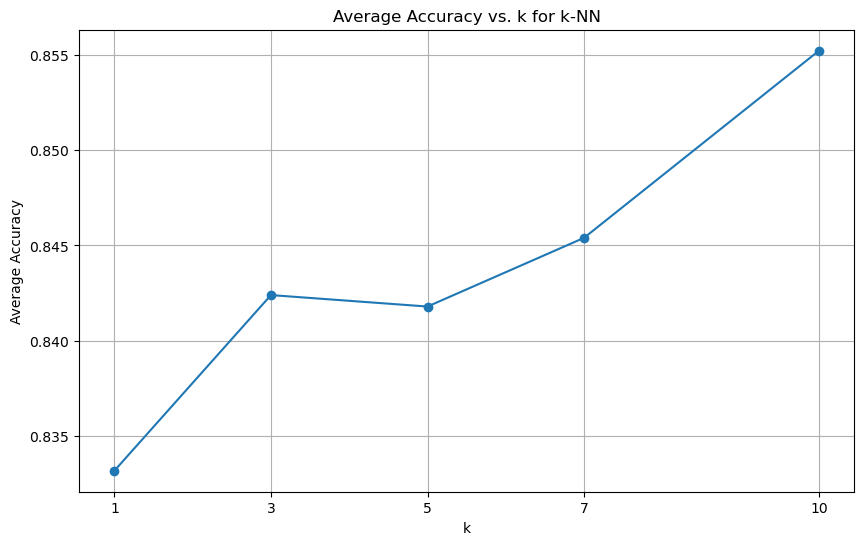

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('emails.csv')
data = data.drop(columns=['Email No.'])
X = data.drop(columns=['Prediction']).values
y = data['Prediction'].values

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


def knn(train_features, train_labels, test_features, k):
    predictions = []
    for test_instance in test_features:
        distances = [euclidean_distance(test_instance, train_instance) for train_instance in train_features]
        indexed_distances = list(enumerate(distances))
        sorted_indexed_distances = sorted(indexed_distances, key=lambda x: x[1])
        k_nearest_indices = [index for index, _ in sorted_indexed_distances[:k]]
        k_nearest_labels = [train_labels[i] for i in k_nearest_indices]
        most_common_label = max(set(k_nearest_labels), key=k_nearest_labels.count)
        predictions.append(most_common_label)
    return predictions


def accuracy_score(y_true, y_pred):
    correct = sum(y_t == y_p for y_t, y_p in zip(y_true, y_pred))
    return correct / len(y_true)

folds = [(0, 1000), (1000, 2000), (2000, 3000), (3000, 4000), (4000, 5000)]
k_values = [1, 3, 5, 7, 10]
average_accuracies = []

for k in k_values:
    accuracies = []
    for fold, (start, end) in enumerate(folds):
        test_set = X[start:end]
        test_labels = y[start:end]
        train_set = np.concatenate((X[:start], X[end:]), axis=0)
        train_labels = np.concatenate((y[:start], y[end:]), axis=0)

        predictions = knn(train_set, train_labels, test_set, k)
        accuracy = accuracy_score(test_labels, predictions)
        accuracies.append(accuracy)

    average_accuracy = np.mean(accuracies)
    average_accuracies.append(average_accuracy)
    print(f"Average accuracy for k={k}: {average_accuracy:.4f}")

plt.figure(figsize=(10,6))
plt.plot(k_values, average_accuracies, marker='o')
plt.title('Average Accuracy vs. k for k-NN')
plt.xlabel('k')
plt.ylabel('Average Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()
